# Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.preprocessing import RobustScaler,StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
pd.set_option("display.max_columns", 100)

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ridwanakmal","key":"d47613ff7b8c36d503860ad5aa867027"}'}

In [ ]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

100% 199k/199k [00:00<00:00, 274kB/s]
100% 199k/199k [00:00<00:00, 274kB/s]


In [ ]:
!unzip '/content/house-prices-advanced-regression-techniques.zip' -d '/content/hoprice'

Archive:  /content/house-prices-advanced-regression-techniques.zip
  inflating: /content/hoprice/data_description.txt  
  inflating: /content/hoprice/sample_submission.csv  
  inflating: /content/hoprice/test.csv  
  inflating: /content/hoprice/train.csv  


# Membaca dataset n mengolah informasi

In [ ]:
train = pd.read_csv('/content/hoprice/train.csv',index_col=0) 
test = pd.read_csv('/content/hoprice/test.csv',index_col=0) 
sub = pd.read_csv('/content/hoprice/sample_submission.csv') 

In [ ]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 80)

In [ ]:
test.shape

(1459, 79)

In [ ]:
for col in train.columns:
  print('COLUMN:', col, '\n', 'DATA_TYPE:', train[col].dtype, '\n')

COLUMN: MSSubClass 
 DATA_TYPE: int64 

COLUMN: MSZoning 
 DATA_TYPE: object 

COLUMN: LotFrontage 
 DATA_TYPE: float64 

COLUMN: LotArea 
 DATA_TYPE: int64 

COLUMN: Street 
 DATA_TYPE: object 

COLUMN: Alley 
 DATA_TYPE: object 

COLUMN: LotShape 
 DATA_TYPE: object 

COLUMN: LandContour 
 DATA_TYPE: object 

COLUMN: Utilities 
 DATA_TYPE: object 

COLUMN: LotConfig 
 DATA_TYPE: object 

COLUMN: LandSlope 
 DATA_TYPE: object 

COLUMN: Neighborhood 
 DATA_TYPE: object 

COLUMN: Condition1 
 DATA_TYPE: object 

COLUMN: Condition2 
 DATA_TYPE: object 

COLUMN: BldgType 
 DATA_TYPE: object 

COLUMN: HouseStyle 
 DATA_TYPE: object 

COLUMN: OverallQual 
 DATA_TYPE: int64 

COLUMN: OverallCond 
 DATA_TYPE: int64 

COLUMN: YearBuilt 
 DATA_TYPE: int64 

COLUMN: YearRemodAdd 
 DATA_TYPE: int64 

COLUMN: RoofStyle 
 DATA_TYPE: object 

COLUMN: RoofMatl 
 DATA_TYPE: object 

COLUMN: Exterior1st 
 DATA_TYPE: object 

COLUMN: Exterior2nd 
 DATA_TYPE: object 

COLUMN: MasVnrType 
 DATA_TYPE: obje

# Target engineering

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


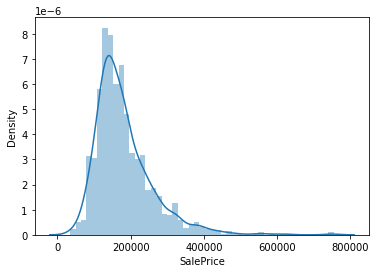

In [ ]:
sns.distplot(train['SalePrice'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [ ]:
# log transform the target
train['SalePrice'] = np.log(train['SalePrice'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


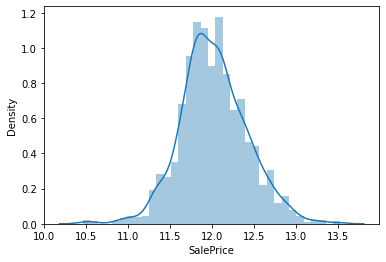

In [ ]:
sns.distplot(train['SalePrice'])

## split kolom jd features(X) dan target(y)


In [ ]:
X = pd.concat([train.drop("SalePrice", axis=1),test], axis=0)
y = train[['SalePrice']]

In [ ]:
# mengambil fitur numerik
num = X.select_dtypes(exclude=['object','category'])
num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
# mengambil fitur katgorik
cat = X.select_dtypes(include=['object','category'])
cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Analisis Univariat

## Histogram

Dilakukan ploting histogram pada numerikal fitur, dengan concern utama adalah distribusi dari fitur untuk melihat karektristik statistik dari data

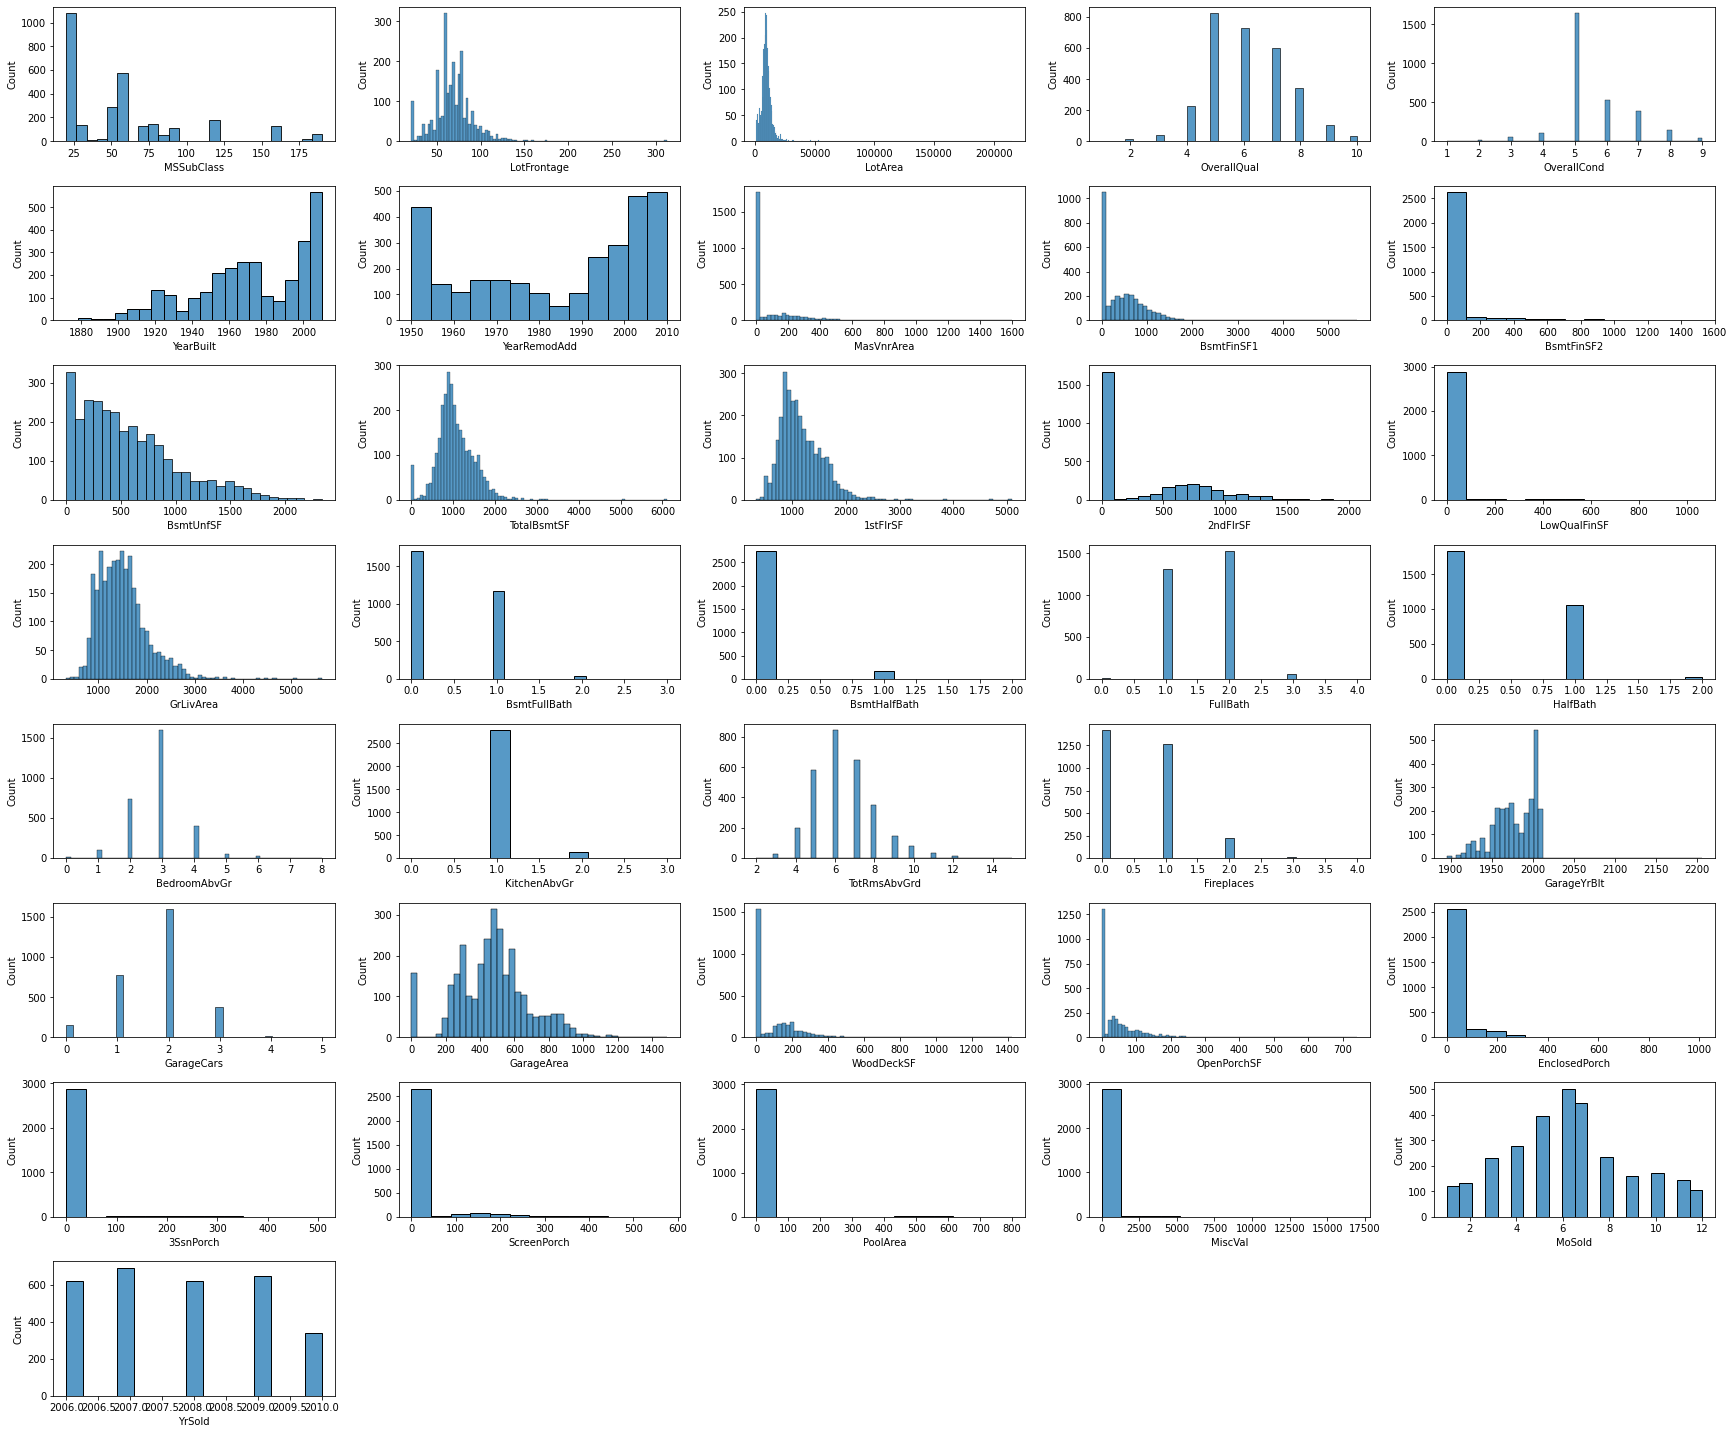

In [ ]:
fig = plt.figure(figsize=(24,20))

for i, col in enumerate(num):
  plt.subplot(8, 5, i+1)
  sns.histplot(x=X[col], kde=False)

fig.tight_layout(pad=1.0)

terdapat beberapa fitur dengan imbalance dimana sebagian besar hanya memiliki 1 value dominan dalam plot tsb, antara lain:
- BsmtFinSF2
- LowQualFinSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal



## Countplot

Dilakukan ploting countplot pada kategorikal fitur, dengan concern utama adalah menghitung nilai unik dari setiap fitur 

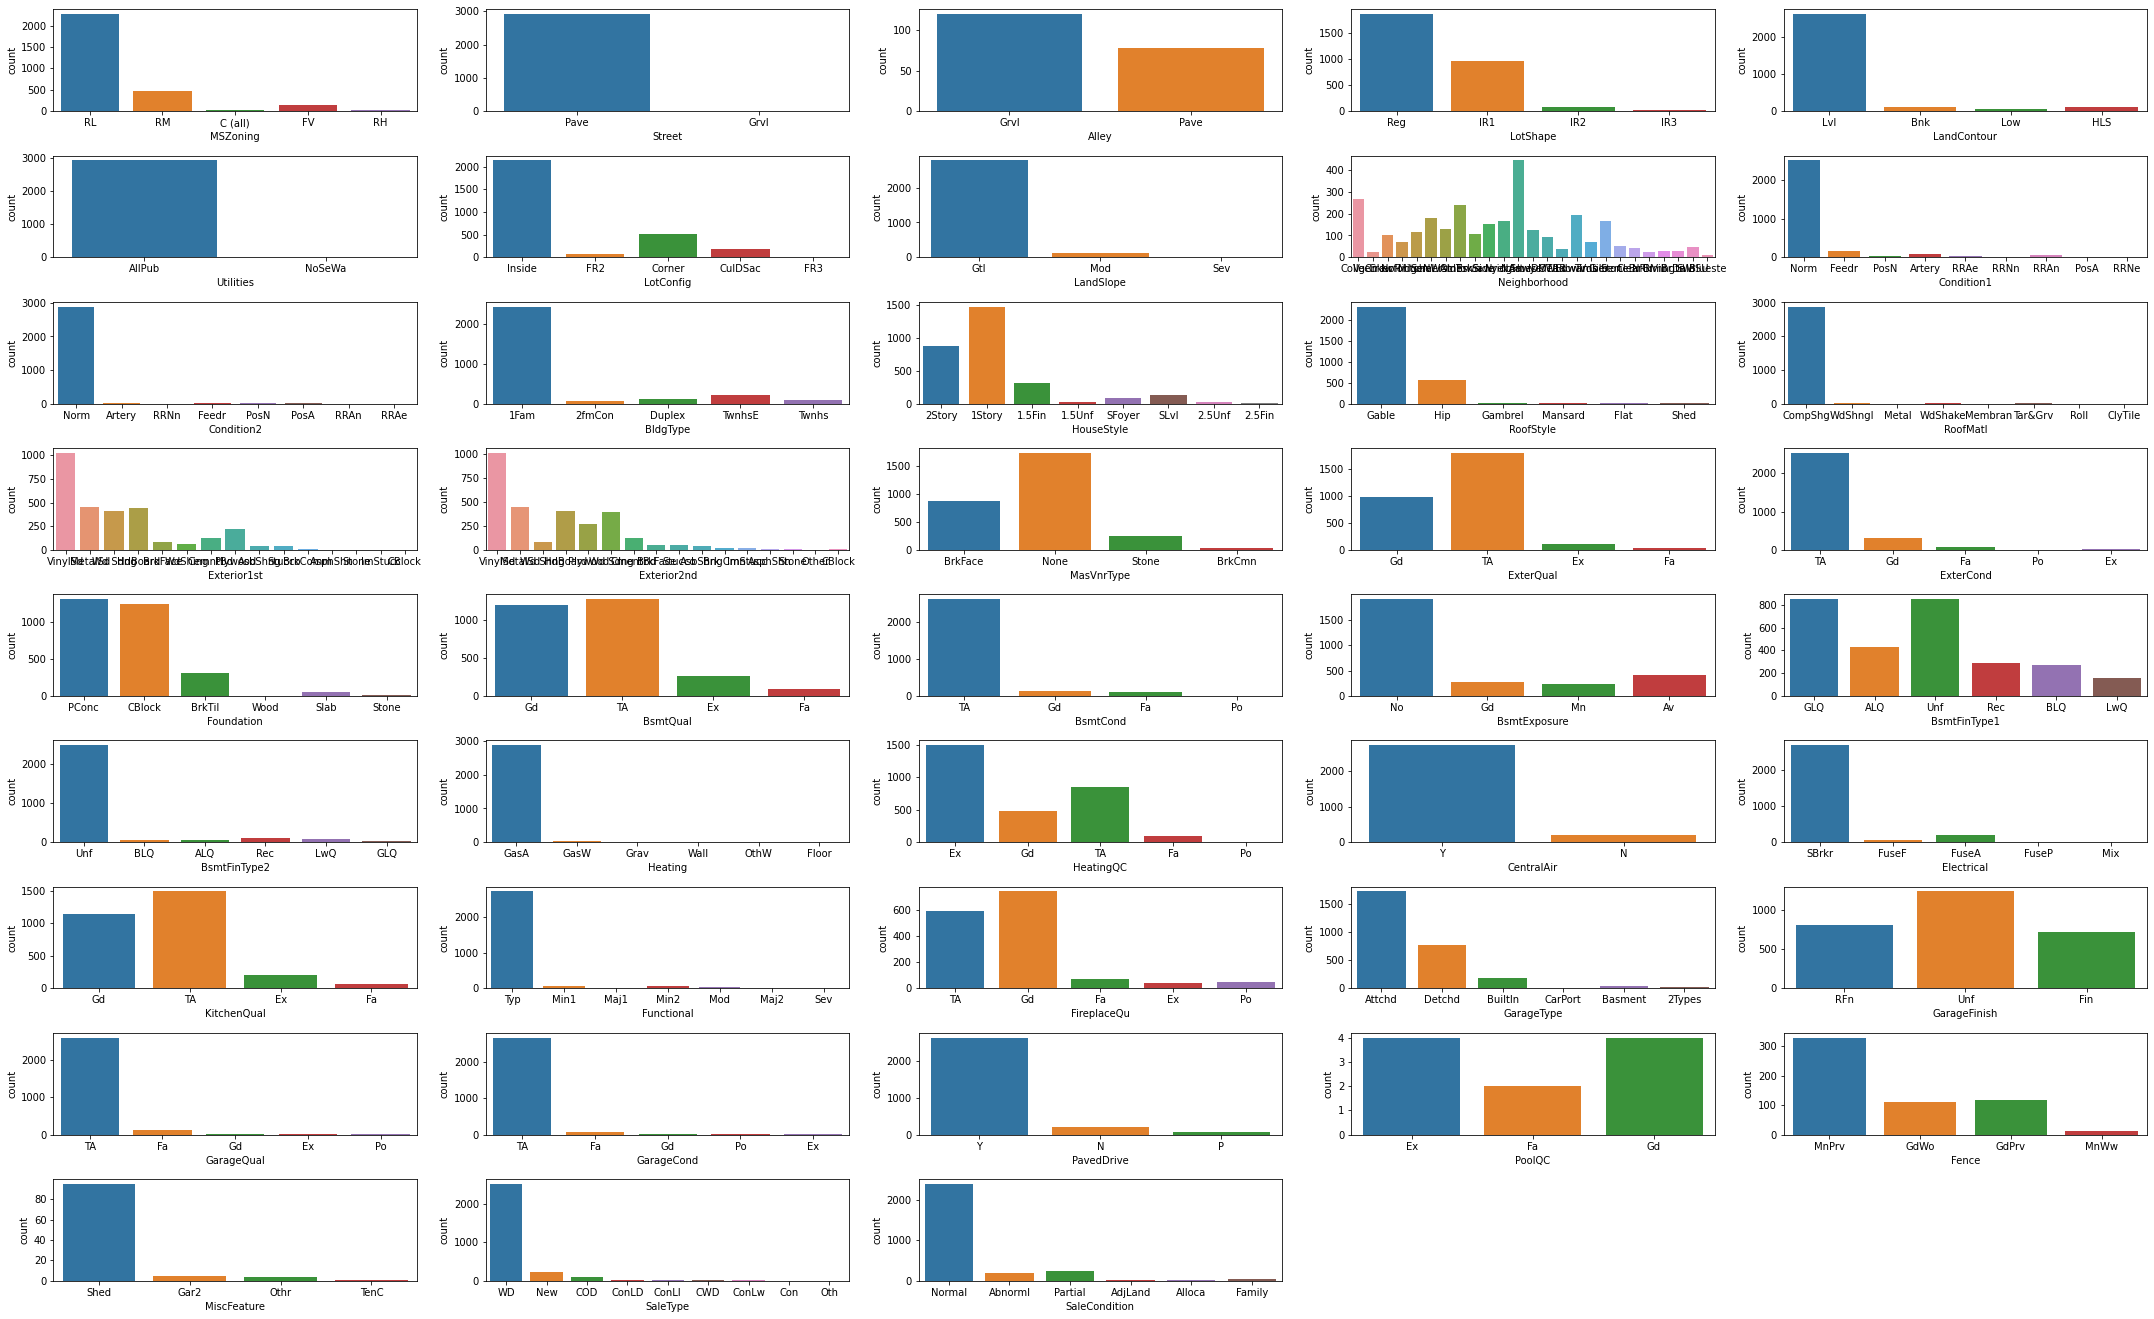

In [ ]:
fig = plt.figure(figsize=(30,20))

for i, col in enumerate(cat):
  plt.subplot(10, 5, i+1)
  sns.countplot(x=X[col])

fig.tight_layout(pad=1.0)

Analisis univariat sangat berguna dalam mendapatkan insight tunggal antar setiap fitur, serta memperdalaam dan menambah wawasan pattern potensial didalam data yang kita punya.

# Analisis Bivariat

## Corr Matrix

Ini berguna untuk menangkap hubungan atau pattern yang berbeda antar kedua fitur kontinu, manfaat lain selain dapat menentukan fitur mana yang berkaitan erat dengan target kita dapat melihat multikolinearitas antar fitur-fitur independen yang tentunya dapat di drop salah satu fiturnya

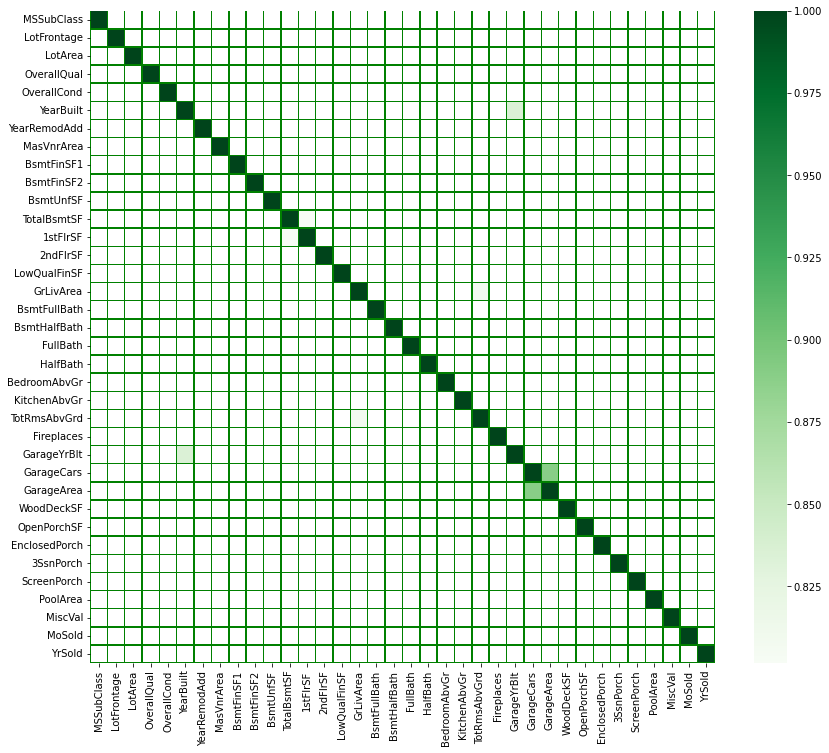

In [ ]:
plt.figure(figsize=(14,12))
correlation = num.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Greens',linecolor='green')

Terlihat dari plot corr matrix terdapat beberapa fitur yang memiliki korelasi tinggi satu sama lain, yaitu:
- GarageYrBlt and YearBuilt
- TotRmsAbvGrd and GrLivArea
- GarageArea and GarageCars

## Num features VS Target

In [ ]:
# identifikasi fitur numerik vs target
num_train = train.select_dtypes(exclude=['object','category'])
correlation = num_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'],ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.817184
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
YearBuilt,0.586570
YearRemodAdd,0.565608


# Scatterplot

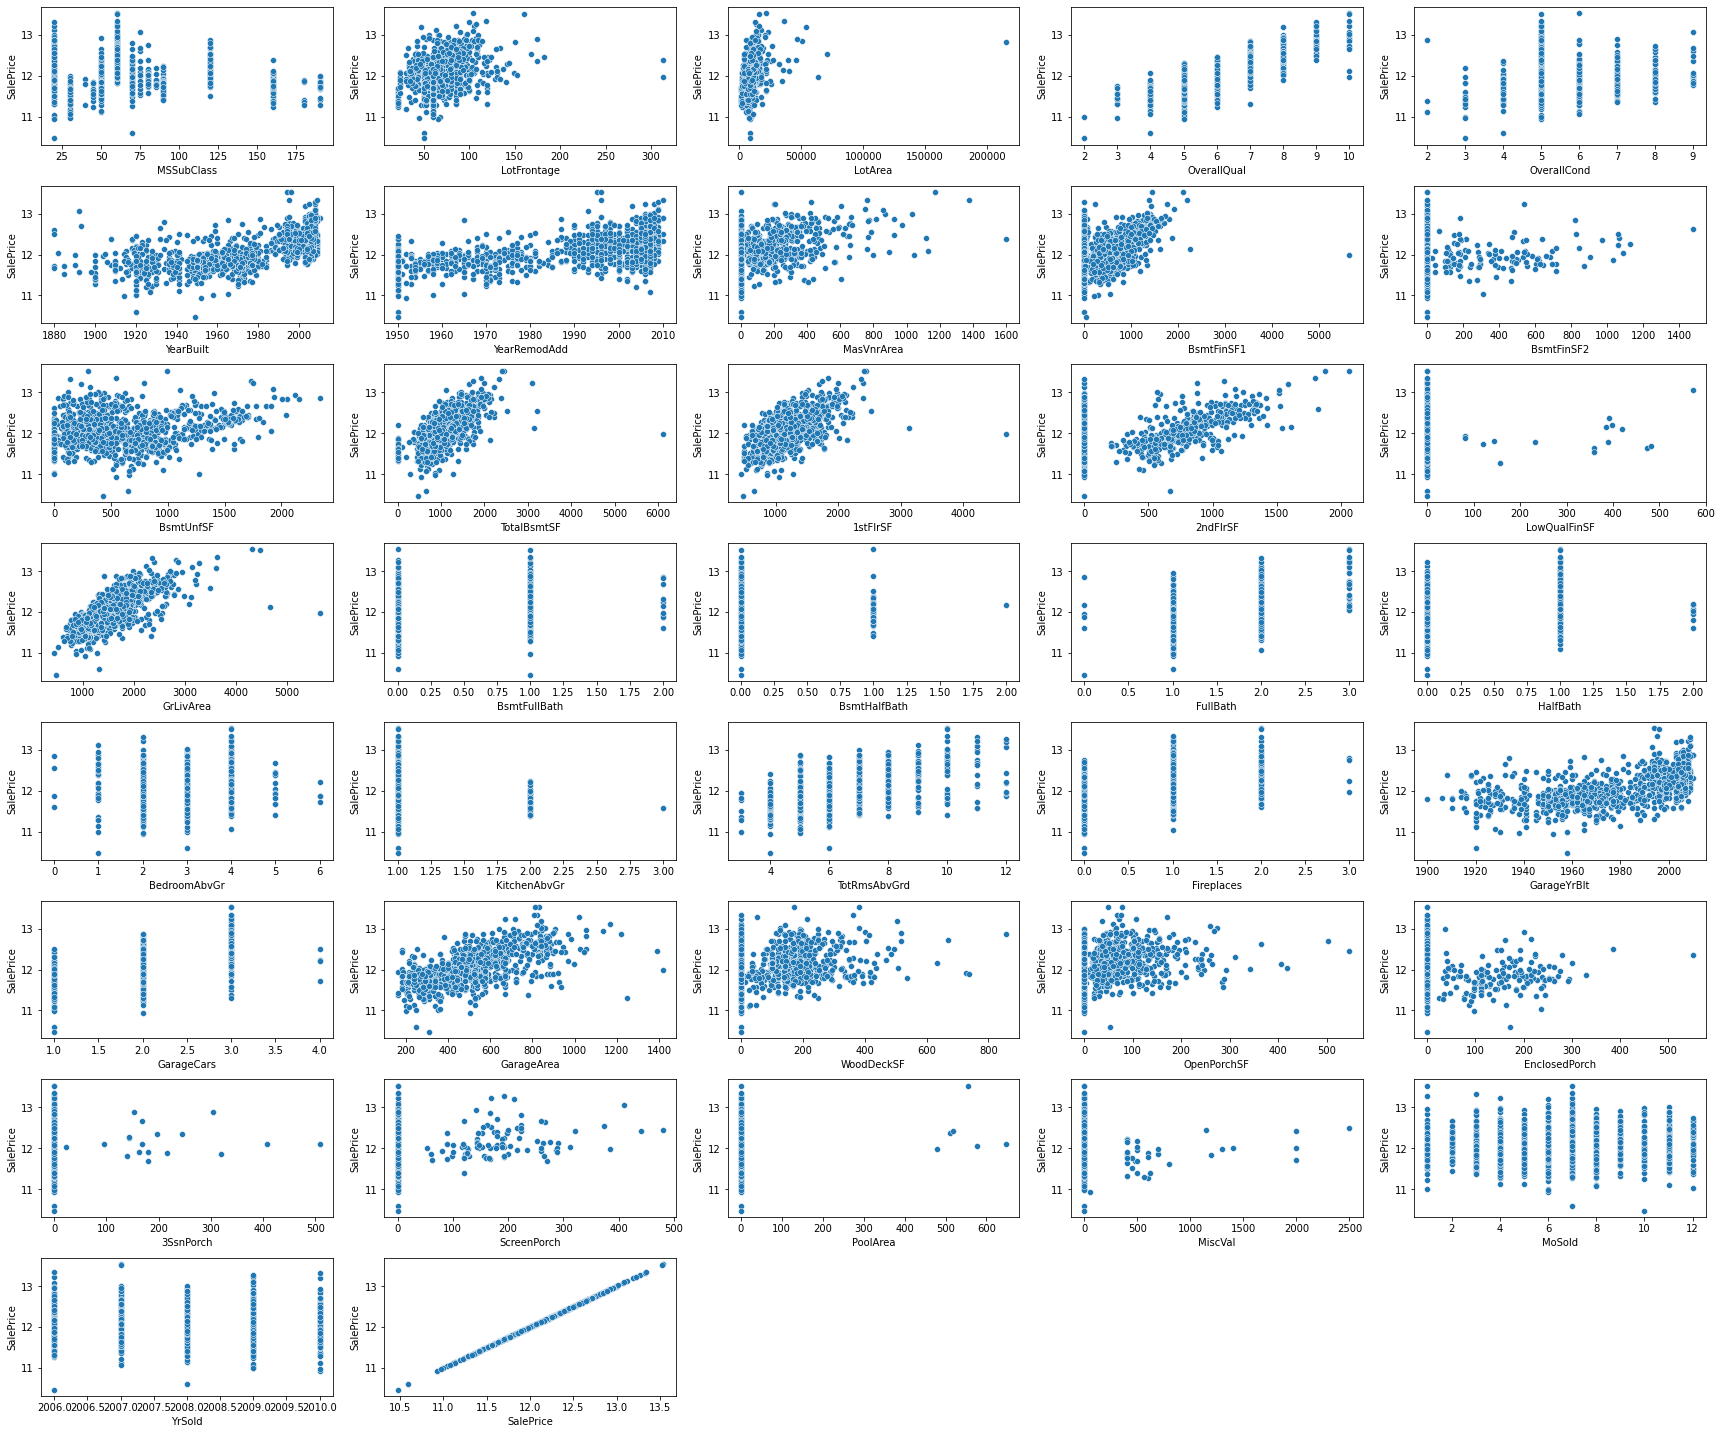

In [ ]:
fig = plt.figure(figsize=(24,20))

for i, col in enumerate(num_train):
  plt.subplot(8, 5, i+1)
  sns.scatterplot(x=num_train[col], y='SalePrice',data=num_train.dropna())

fig.tight_layout(pad=1.0)

# Preprocessing Data

## Hapus fitur redundan 

In [ ]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

In [ ]:
# melihat fitur dengan missing value terbanyak
data_mv = (X.isna().sum()/len(X))*100
data_mv = data_mv.drop(data_mv[data_mv==0].index).sort_values(ascending=False)
missing_dt = pd.DataFrame(
    {'ratio of mv': data_mv}
)
missing_dt.head(10) 

,ratio of mv
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageCond,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageType,5.378554


Data dengan nilai missing sebanyak >90% akan didrop

In [ ]:
X.drop(['PoolQC','MiscFeature','Alley'], axis=1, inplace=True)

Dari plot histogram untuk numerikal fitur dan countplot untuk kategorikal, kita dapat mendrop fitur dengan kesamaan value yang tinggi dimana fitur tsb tidak terlalu berguna dalam proses modeling, contohnya dapat kita lihat di histogram MiscVal, lalu di couhntplot terdapat fitur Street yang memiliki satu value yang sangat dominan dibanding value lain.

In [ ]:
X = X.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating','LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal' ], axis=1)

## Menangani outliers

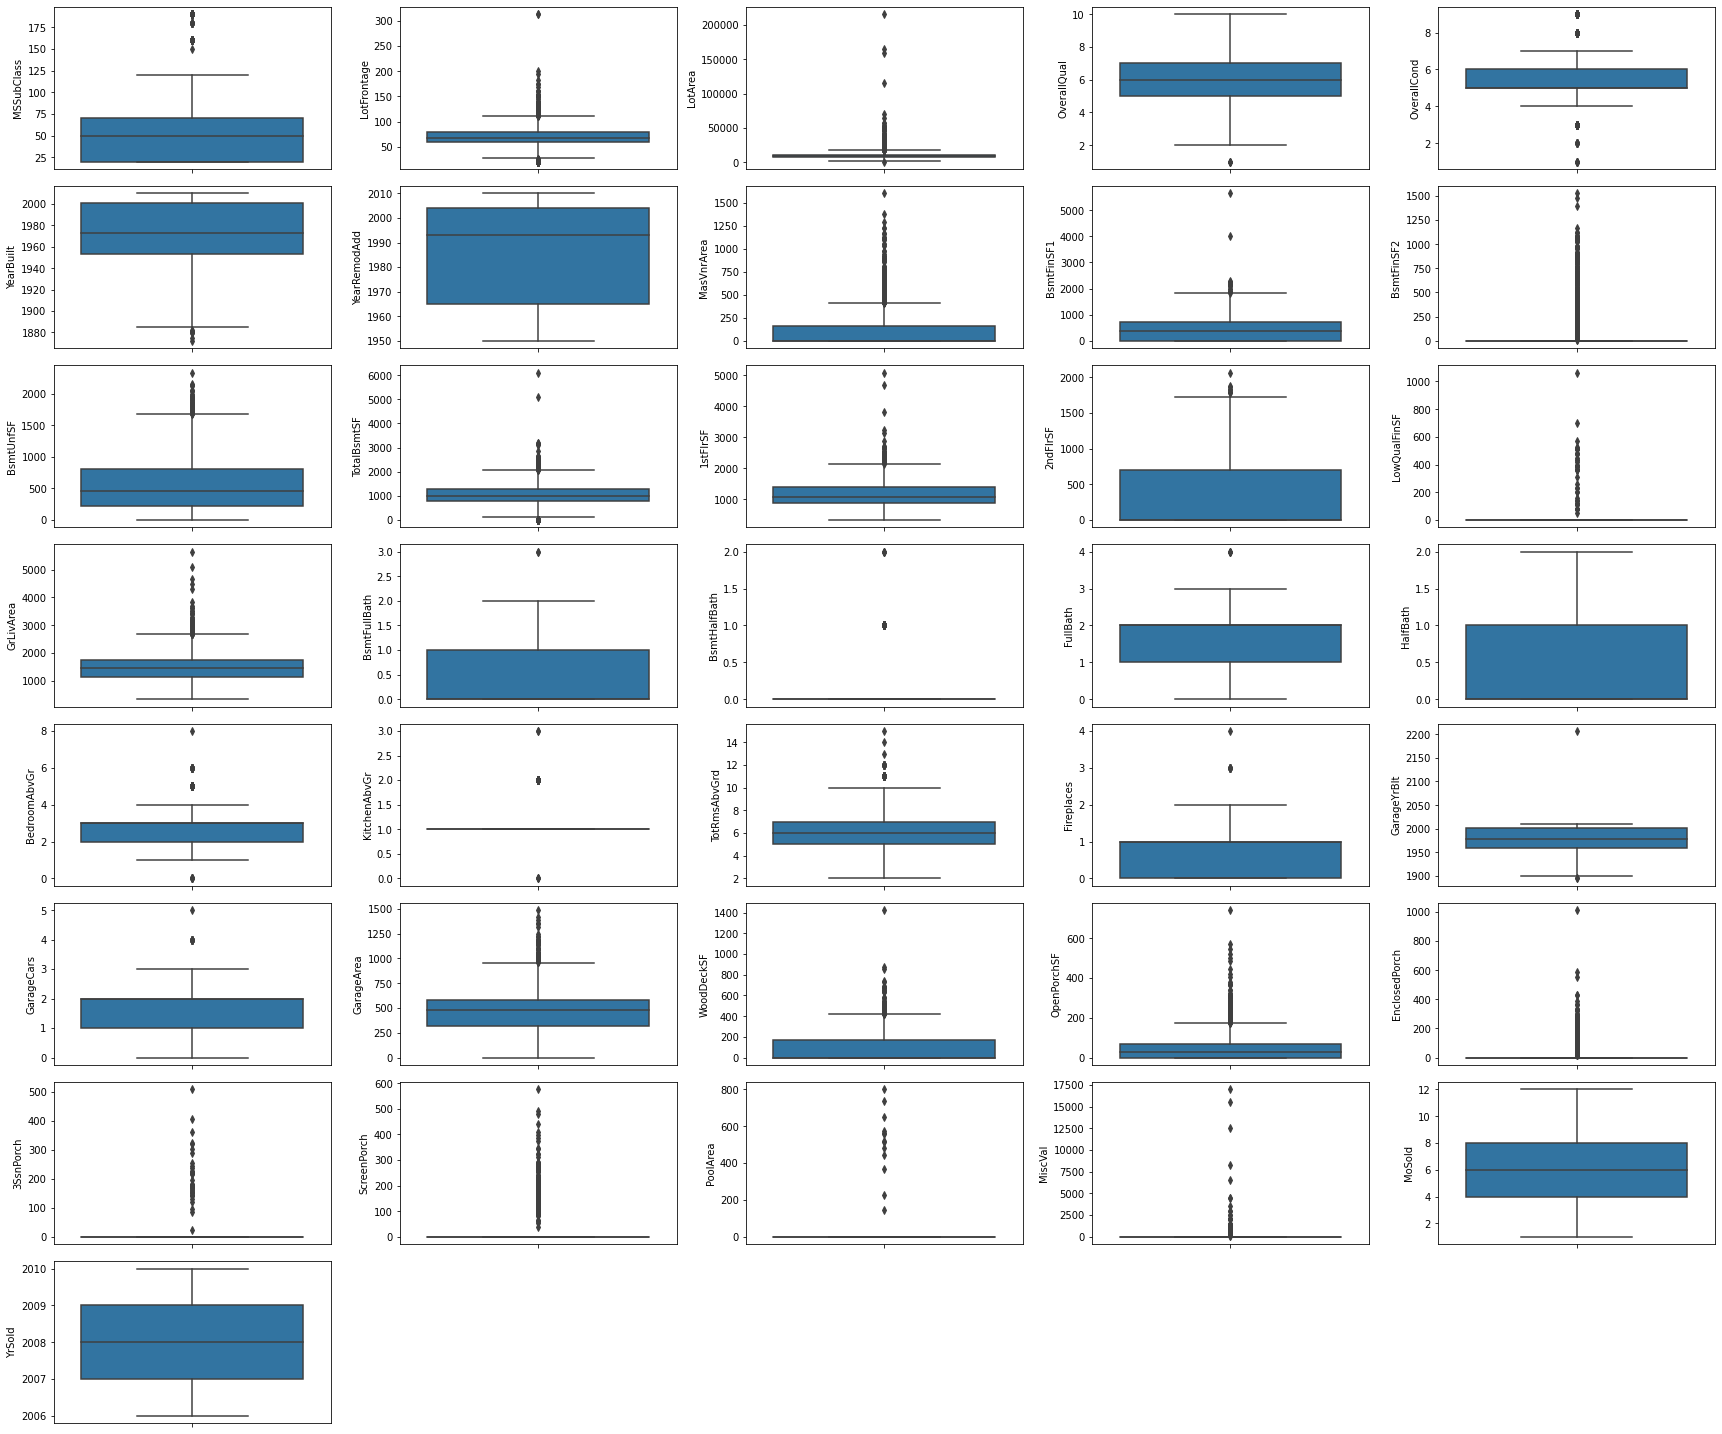

In [ ]:
fig = plt.figure(figsize=(24,20))

for i, col in enumerate(num):
  plt.subplot(8, 5, i+1)
  sns.boxplot(y=num[col], data=num)

fig.tight_layout(pad=1.0)

remove outliers berdasarkan nilai threshold

In [ ]:
train = train.drop(train[train['LotFrontage'] > 200].index)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

In [ ]:
X.shape

(2919, 63)

## Menangani missing data

In [ ]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1', 
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond']

X[cat] = X[cat].fillna("NA")

In [ ]:
#categorical
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]
X[cols] = X.groupby("Neighborhood")[cols].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
# untuk fitur yang berkorelasi
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

# numerical
cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont] = X[cont].fillna(X[cont].mean())

In [ ]:
X['MSSubClass'] = X['MSSubClass'].apply(str)

## Mapping fitur ordinal

In [ ]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [ ]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)
    
fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

# Feature engineering

In [ ]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

In [ ]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin'
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
# convert cat to numerical
X = pd.get_dummies(X)

# Fase modeling 

In [ ]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = x.select_dtypes(np.number).columns
transformer = scaler.fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

## Xgboost algo

In [ ]:
xgb = XGBRegressor(booster='gbtree')

### Xgboost hyperparam tuning

In [ ]:
param_lst = {
 'max_depth': [3, 6, 10],
 'colsample_bytree': [0.4, 0.6, 0.8],
 'n_estimators': [100, 150, 200],
 'subsample': [0.4, 0.6, 0.8],
 'gamma': [1, 5, 10],
 'learning_rate': [0.01, 0.1, 1],
 'reg_alpha': [0.01, 0.1, 10],
 'reg_lambda': [0.01, 0.1, 10]
}

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 100, cv = 5)
       
xgb_search = xgb_reg.fit(X_train, y_train)

# XGB with tune hyperparameters
best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

[14:48:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## LGBM algo

In [50]:
lgbm = LGBMRegressor(boosting_type='gbdt')

### LGBM hyperparam tuning

In [51]:
param_lst = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                              n_iter = 100, cv = 5)
       
lightgbm_search = lightgbm.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

## Random Forest algo

In [52]:
rf = RandomForestRegressor()

### Random Forest hyperparam tuning

In [ ]:
!pip install jcopml

In [54]:
from jcopml.tuning import random_search_params as rsp

In [55]:
param_lst = {
 'n_estimators': [100,150,200],
 'max_depth': [20, 50, 80],
 'max_features': [0.3, 0.6, 0.8],
 'min_samples_leaf': [1, 5, 10]
}

random_forest = RandomizedSearchCV(estimator = rf, param_distributions = param_lst,
                              n_iter = 100, cv = 5)
       
random_forest_search = random_forest.fit(X_train, y_train)

# LightBGM with tuned hyperparameters
best_param = random_forest_search.best_params_
rf = RandomForestRegressor(**best_param)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 81 is smaller than n_iter=100. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

In [56]:
from sklearn.metrics import mean_absolute_error

In [58]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

rf.fit(X_train, y_train)   
preds = rf.predict(X_val) 
preds_test_rf = rf.predict(test)
mae_rf = mean_absolute_error(y_val, preds)
rmse_rf = np.sqrt(mean_squared_error(y_val, preds))
score_rf = rf.score(X_val, y_val)
cv_rf = mean_cross_val(rf, x, y)


xgb.fit(X_train, y_train)   
preds = xgb.predict(X_val) 
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, x, y)


lgbm.fit(X_train, y_train)   
preds = lgbm.predict(X_val) 
preds_test_lgbm = lgbm.predict(test)
mae_lgbm = mean_absolute_error(y_val, preds)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, preds))
score_lgbm = lgbm.score(X_val, y_val)
cv_lgbm = mean_cross_val(lgbm, x, y)

<ipython-input-58-7983b10f0e69>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

[15:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:36:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [59]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost", "LGBM", "RandomForest"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_lgbm)[0:5], str(cv_rf)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_lgbm)[0:5], str(mae_rf)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_lgbm)[0:5], str(rmse_rf)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_lgbm)[0:5], str(score_rf)[0:5]]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
          Model  CV(5)    MAE   RMSE  Score
1          LGBM  0.907  0.086  0.131  0.887
2  RandomForest  0.890  0.088  0.137  0.876
0       XGBoost  0.861  0.104  0.154  0.842


In [66]:
def blend_models_predict(X, b, c, d):
        return ((b* xgb.predict(X)) + (c * rf.predict(X)) + (d * lgbm.predict(X)))

In [68]:
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("submissionhouse3.csv", index=False)